In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/hh_hard.csv')

In [ ]:
df.head(10)

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}"
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}"
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}"
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}"
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}"
5,72124633,Дефектоскопист,Технолог,1-3,full_day,full,Деталь Проект,False,"['Ведение документооборота', 'Базовые знания П...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":60000.0}"
6,72124864,Водитель-кладовщик,Водитель,0,full_day,full,Автоцентр АВТОГИК,False,"['Базовые знания ПК', 'Коммуникативная грамотн...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":35000.0,""salary_to"":85000.0}"
7,72125286,Электромонтер,Электромонтажник,3-6,labor,full,Эко-Системы,False,"['Монтаж металлоконструкций', 'Выполнение стро...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":100000.0,""salary_to"":150000.0}"
8,72125786,Менеджер по продажам,"Менеджер по продажам, менеджер по работе с кли...",1-3,full_day,full,"Мототека, филиал г.Томск",False,"['Продажи', 'Коммуникативная грамотность', 'Гр...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":95000.0}"
9,72125979,Менеджер по продажам,Агент по недвижимости,0,full_day,full,ДомПлюс,False,"['Продажи', 'Продажи', 'Коммуникативная грамот...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":80000.0,""salary_to"":null}"


In [ ]:
df.shape

(20178, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20178 entries, 0 to 20177
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20178 non-null  int64 
 1   name                20178 non-null  object
 2   professional_roles  20178 non-null  object
 3   experience          20178 non-null  object
 4   schedule            20178 non-null  object
 5   employment          20178 non-null  object
 6   employer            20178 non-null  object
 7   accept_handicapped  20178 non-null  bool  
 8   key_skills          20178 non-null  object
 9   area                20178 non-null  object
 10  salary              20178 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.6+ MB


В датасете содержатся следующие типы данных:

1) Категориальные данные: name (наименование вакансии), professional roles (профессиональная роль), schedule (график работы), employment (тип занятости), employer (наименование работодателя), area (регион)

2) Количественные дискретные: id (идентификатор вакансии)

3) Количественные непрерывные: salary (зарплата)

4) Порядковые: experience (опыт работы)

5) Логический тип (bool) в признаке accept_handicapped(доступ вакансии): true (доступна), false (недоступна)

Рекомендуются следующие преобразования для дальнейшей работы с датасетом:

1) Вместо минимальной и максимальной зарплаты (salary_from и salary_to) рассчитать среднюю зарплату

2) Заменить вилки значений в "experience" 1-3 на 2, 3-6 на 4.5, 6+ на 7.5

3) Вывести максимальную и минимальную зарплаты для каждой вакансии в отдельные столбцы (для проведения анализа взаимосвязи признаков)

4) так как в area большое количество наименований: город, регион и т.д, стоит вывести их в отдельные столбцы для упрощения анализа

### Очистка данных

In [ ]:
#проверим датасет на наличие дубликатов и пропусков

df.isnull().sum()
df.duplicated().sum()

np.int64(178)

In [ ]:
#удалим дубликаты
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(20000, 11)

In [ ]:
df['area'].unique()
#так как страна регион и округ совпадают, оставим только город

array(['{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Томск"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Могочино"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Каргала"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Первомайское (Томская область)"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Чажемто"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Самусь"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Колпашево"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Рыбалово"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Парбиг"}',
       '{"country":"Россия","region":"Томская область","district":"Сибирский","city":"Копылово"

### Обработка данных

In [ ]:
#выведем "salary_from" и "salary" в отдельные столбцы
import json
df['salary'] = df['salary'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['salary_from'] = df['salary'].apply(lambda x: x.get('salary_from'))
df['salary_to'] = df['salary'].apply(lambda x: x.get('salary_to'))
df['salary_from'] = pd.to_numeric(df['salary_from'], errors='coerce')
df['salary_to'] = pd.to_numeric(df['salary_to'], errors = 'coerce')

In [ ]:
#заменим значение в "salary"на среднюю зарплату
df['salary_avg'] = (df['salary_from'] + df['salary_to']) / 2
df['salary'] = df['salary_avg']
df.drop(['salary'], axis=1, inplace=True)

In [ ]:
#оставим из "area" только город
import ast
df['city'] = df['area'].apply(lambda x: ast.literal_eval(x).get('city'))
df.drop(['area'], axis=1, inplace= True)

### Разведочный анализ данных

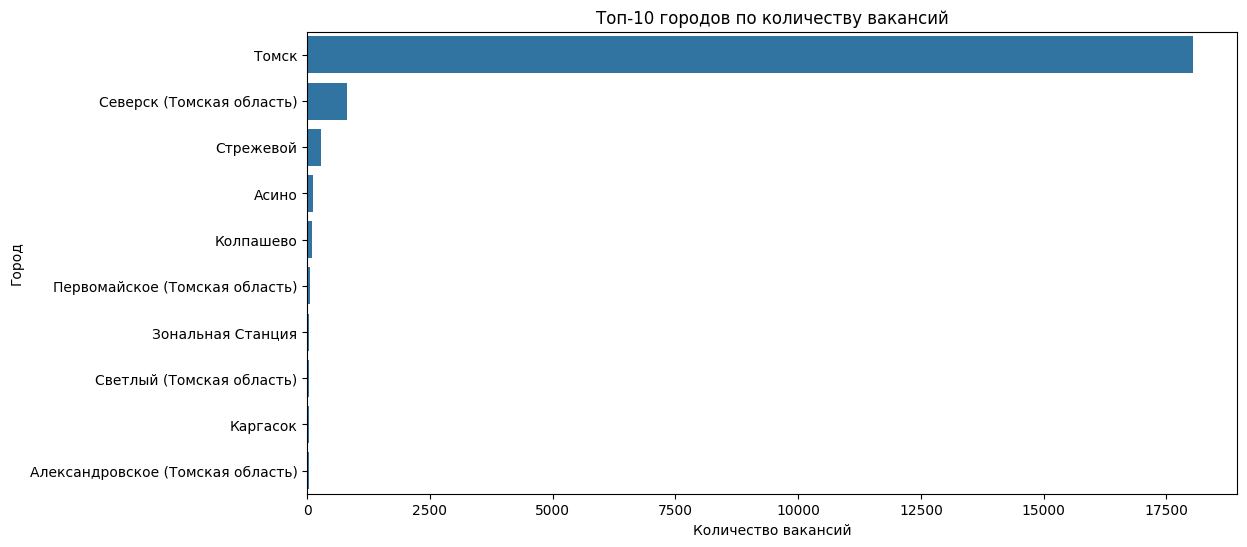

In [ ]:
#Анализ спроса по городам и специальностям
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Топ-10 городов по количеству вакансий')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.show()

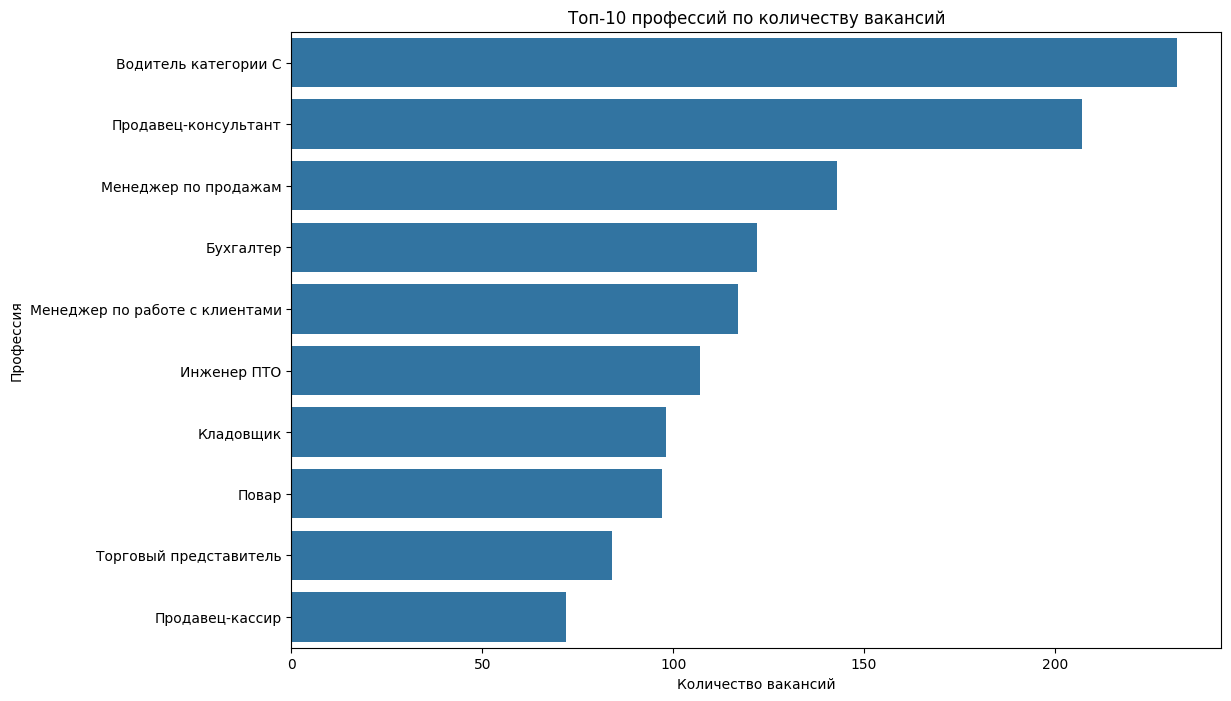

In [ ]:
# Топ-10 профессий
top_professions = df['name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_professions.values, y=top_professions.index)
plt.title('Топ-10 профессий по количеству вакансий')
plt.xlabel('Количество вакансий')
plt.ylabel('Профессия')
plt.show()

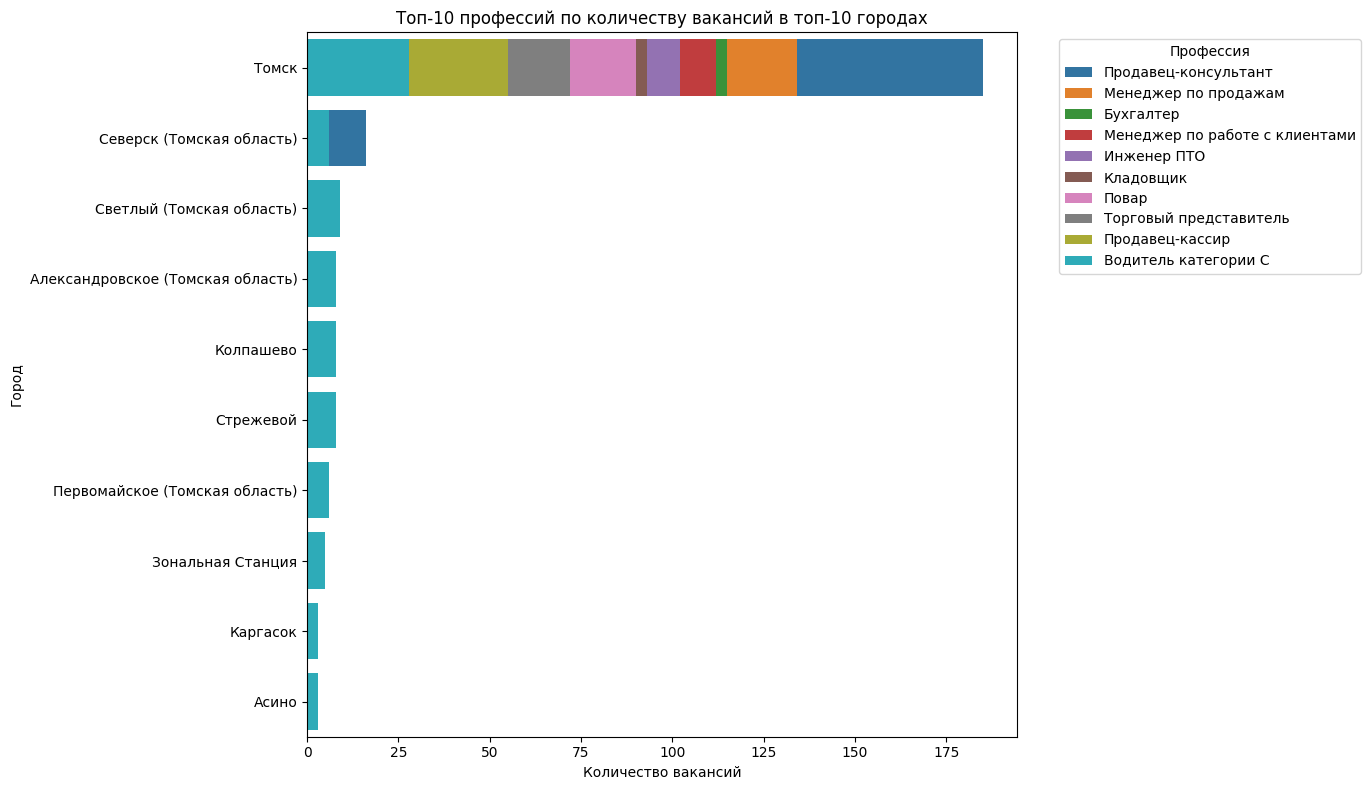

In [ ]:

# Определяем сколько топ 10 вакансий требуется в топ городов области
top_cities = df['city'].value_counts().head(10).index
top_professions = df['name'].value_counts().head(10).index

# Фильтрация данных по топ-10 городам и профессиям
filtered_df = df[(df['city'].isin(top_cities)) & (df['name'].isin(top_professions))]

# Группировка данных
city_profession_demand = filtered_df.groupby(['city', 'name']).size().reset_index(name='count')

# Упорядочиваем данные по количеству вакансий
city_profession_demand = city_profession_demand.sort_values(by='count', ascending=False)

# Визуализация данных
plt.figure(figsize=(14, 8))
sns.barplot(
    data=city_profession_demand,
    x='count',
    y='city',
    hue='name',
    dodge=False
)
plt.title('Топ-10 профессий по количеству вакансий в топ-10 городах')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.legend(title='Профессия', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Анализ требований работодателей

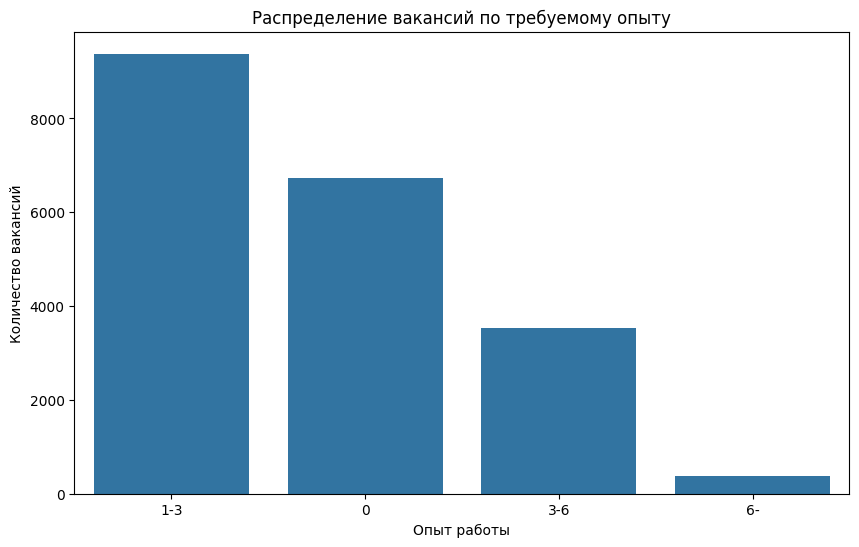

In [ ]:
# Требуемый опыт работы
experience_counts = df['experience'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.title('Распределение вакансий по требуемому опыту')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['experience'].value_counts()

,count
experience,
1-3,9374
0,6734
3-6,3525
6-,367


In [ ]:


# Анализ требуемого опыта работы
experience_counts = df.groupby(['city', 'experience']).size().reset_index(name='count')

# Сортируем, чтобы выделить наиболее популярный опыт по каждому городу
top_experience_per_city = experience_counts.loc[experience_counts.groupby('city')['count'].idxmax()]
top_experience_per_city = top_experience_per_city.sort_values(by='count', ascending=False)

# Печать таблицы с результатами
print(top_experience_per_city)

# Визуализация данных
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_experience_per_city,
    x='count',
    y='city',
    hue='experience',
    dodge=False
)
plt.title('Наиболее часто требуемый опыт работы в городах Томской области')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.legend(title='Опыт работы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

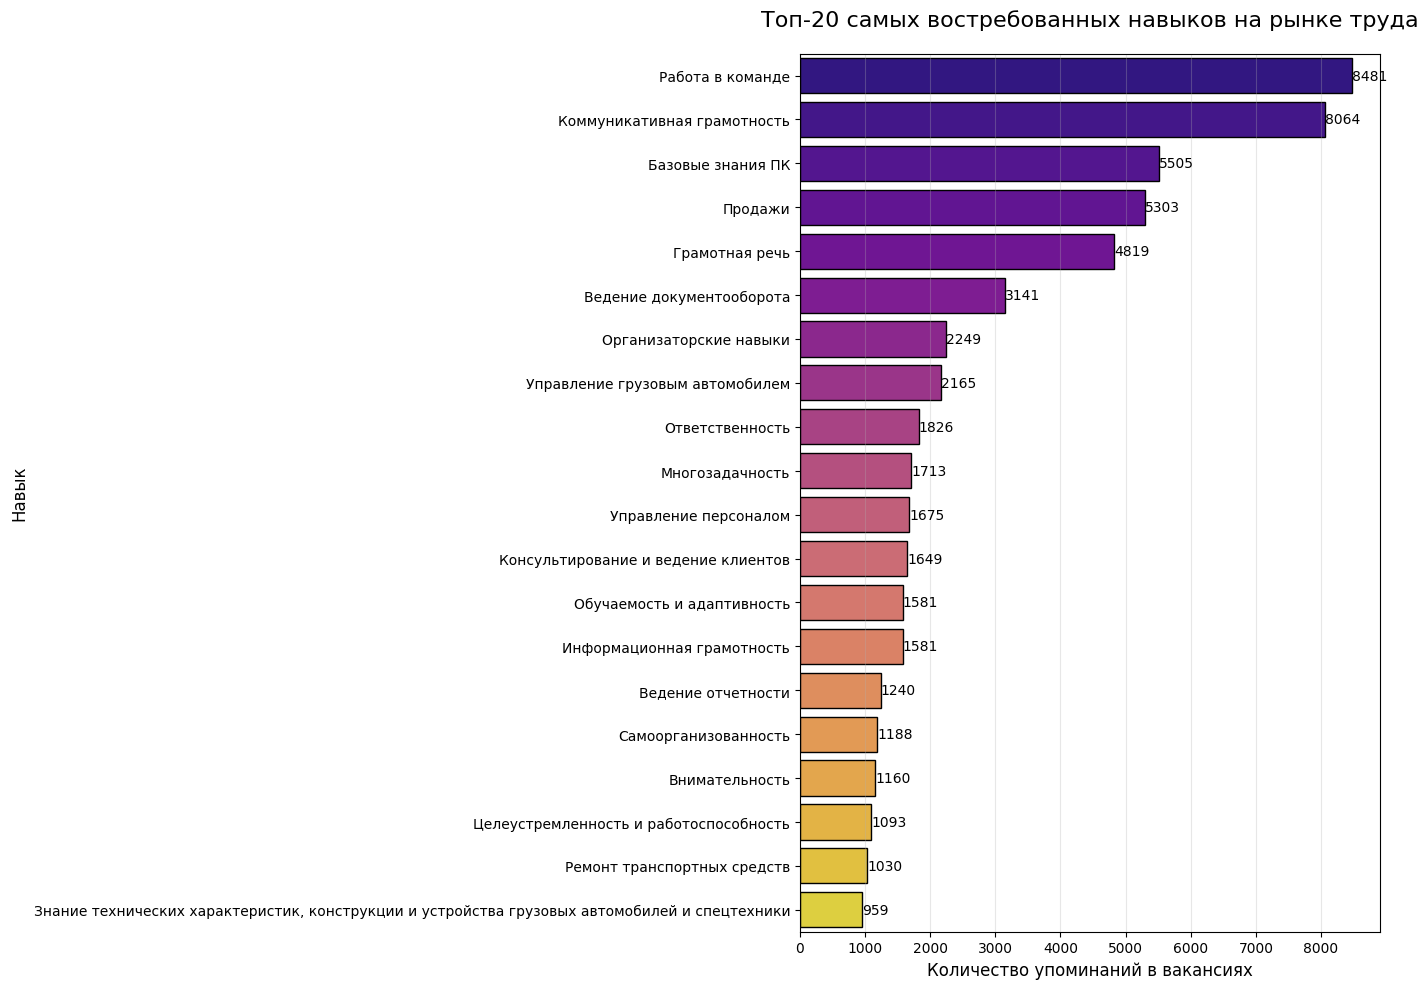

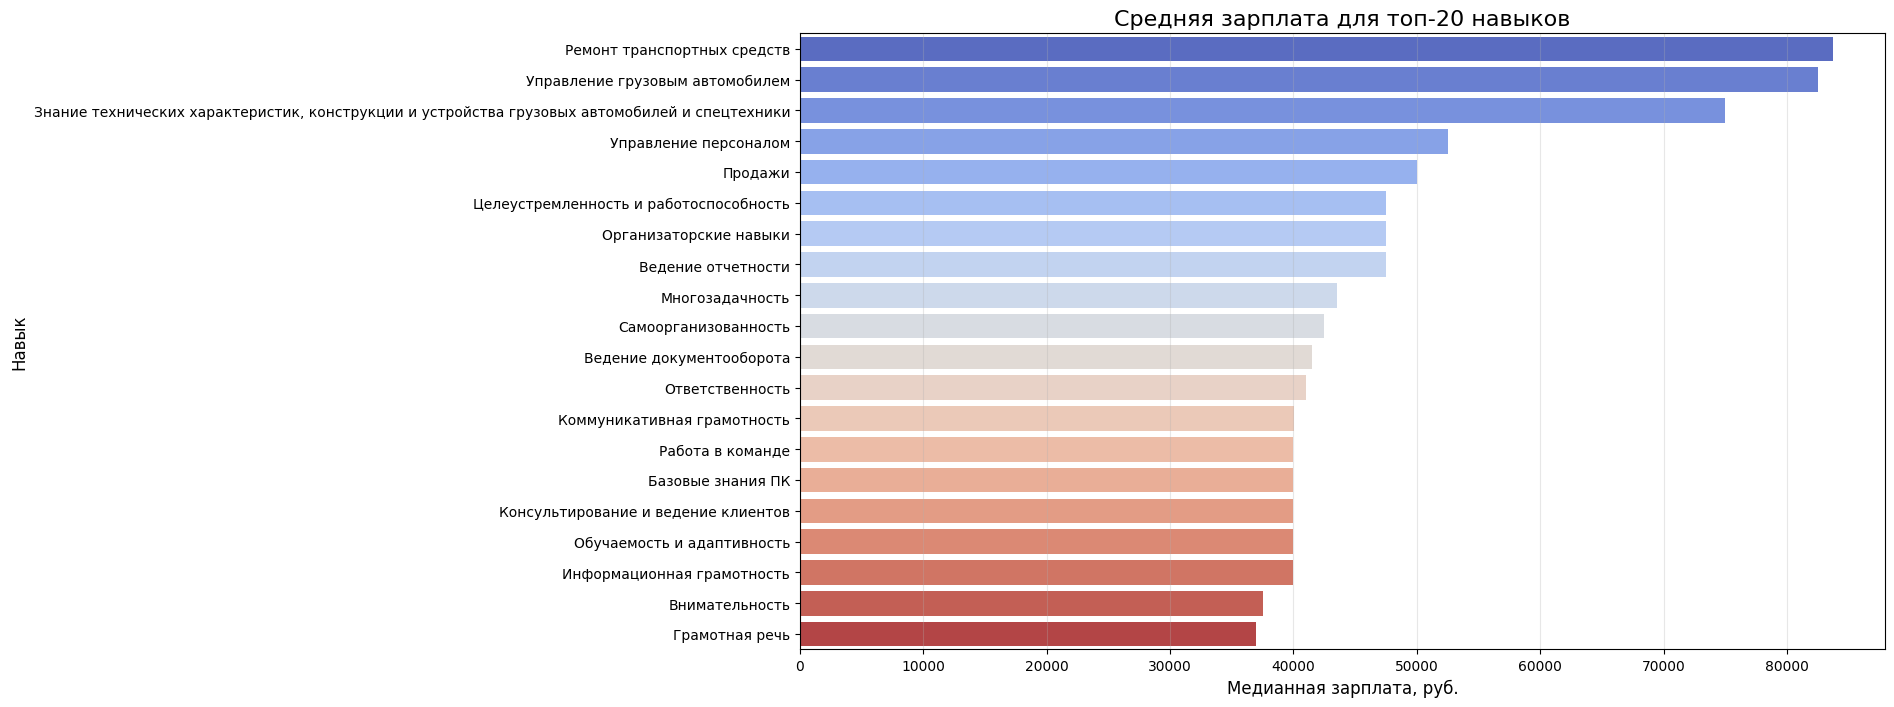

In [ ]:
#требования к навыкам
from ast import literal_eval
from collections import Counter

# 1. Функция для обработки столбца key_skills
def process_skills(skills_str):
    if pd.isna(skills_str) or skills_str == '[]':
        return []

    try:
        # Пробуем преобразовать строку в список
        skills = literal_eval(str(skills_str))
        if isinstance(skills, list):
            return [skill.strip() for skill in skills if skill.strip()]
    except:
        # Если не получается, обрабатываем как строку с разделителями
        skills = str(skills_str).strip("[]").replace("'", "").split(',')
        return [skill.strip() for skill in skills if skill.strip()]

    return []

# 2. Извлекаем и анализируем навыки
df['parsed_skills'] = df['key_skills'].apply(process_skills)
all_skills = [skill for sublist in df['parsed_skills'] for skill in sublist]

# Проверка наличия навыков
if not all_skills:
    print("Ошибка: не удалось извлечь навыки. Проверьте формат данных в key_skills.")
    print("Пример данных:", df['key_skills'].iloc[0])
else:
    # Подсчет и сортировка навыков
    skill_counts = Counter(all_skills)
    top_skills = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count'])\
                           .sort_values('count', ascending=False)\
                           .head(20)

    # 4. Визуализация
    plt.figure(figsize=(14, 10))
    ax = sns.barplot(x='count', y=top_skills.index, data=top_skills,
                    palette='plasma', edgecolor='black')

    # Настройка оформления
    plt.title('Топ-20 самых востребованных навыков на рынке труда',
             fontsize=16, pad=20)
    plt.xlabel('Количество упоминаний в вакансиях', fontsize=12)
    plt.ylabel('Навык', fontsize=12)
    plt.grid(axis='x', alpha=0.3)

    # Добавление значений на столбцы
    for i, count in enumerate(top_skills['count']):
        ax.text(count + 0.5, i, f'{count}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # 5. Дополнительный анализ: связь навыков и зарплат
    if 'salary_avg' in df.columns:
        # Создаем DataFrame для анализа
        skills_salary = []
        for skill in top_skills.index:
            mask = df['parsed_skills'].apply(lambda x: skill in x)
            avg_salary = df[mask]['salary_avg'].median()
            skills_salary.append((skill, avg_salary))

        skills_salary_df = pd.DataFrame(skills_salary,
                                      columns=['skill', 'median_salary'])\
                             .sort_values('median_salary', ascending=False)

        # Визуализация
        plt.figure(figsize=(14, 8))
        sns.barplot(x='median_salary', y='skill', data=skills_salary_df,
                   palette='coolwarm')
        plt.title('Средняя зарплата для топ-20 навыков', fontsize=16)
        plt.xlabel('Медианная зарплата, руб.', fontsize=12)
        plt.ylabel('Навык', fontsize=12)
        plt.grid(axis='x', alpha=0.3)
        plt.show()



### Анализ навыков показал следующие результаты:

Всего найдено уникальных навыков: 846

Топ-5 самых востребованных навыков:
1. Работа в команде: 8481 упоминаний
2. Коммуникативная грамотность: 8064 упоминаний
3. Базовые знания ПК: 5505 упоминаний
4. Продажи: 5303 упоминаний
5. Грамотная речь: 4819 упоминаний

В число самых высокооплачиваемых навыков вошли hard-skills такие как умение ремонтировать, управлять транспортным средством, управлять персоналом. Наименее оплачиваемые навыки - универсальные компетенции soft skills: работа в команде, грамотная речь и т.п.

### Анализ условий труда

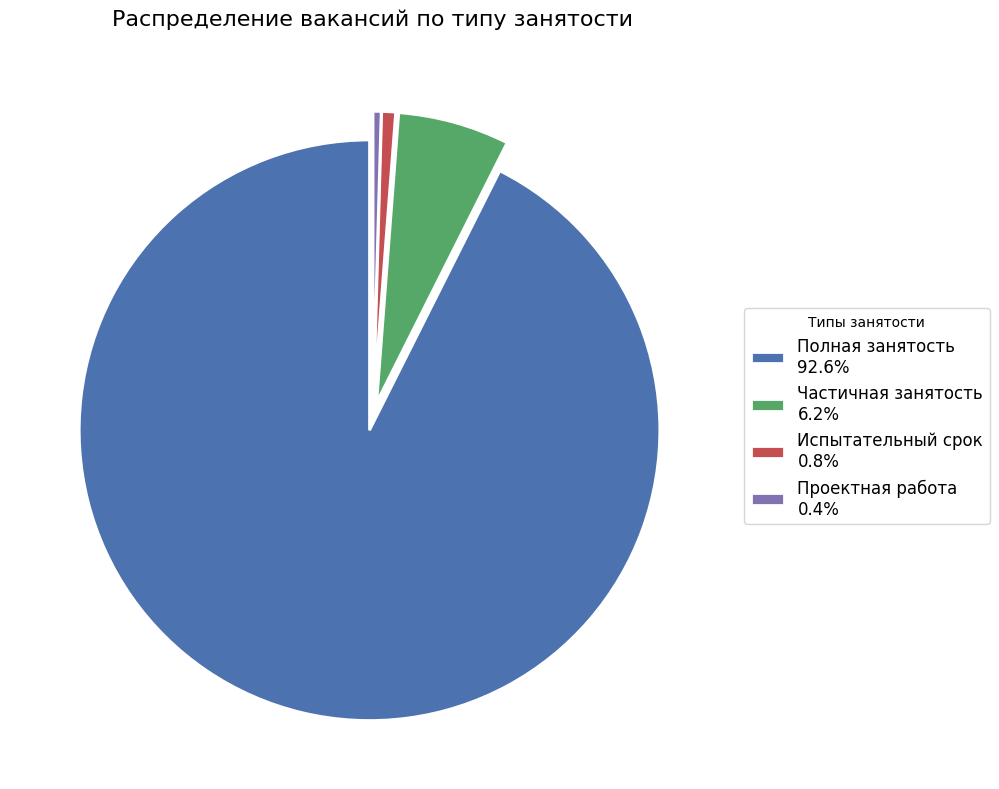

In [ ]:
# Распределение по типу занятости
employment_counts = df['employment'].value_counts()
employment_names = {
    'full': 'Полная занятость',
    'part': 'Частичная занятость',
    'project': 'Проектная работа',
    'probation': 'Испытательный срок'
}
labels = [f"{employment_names.get(key, key)}\n{value/sum(employment_counts)*100:.1f}%"
          for key, value in employment_counts.items()]

plt.figure(figsize=(12, 8))
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
explode = (0.05, 0.05, 0.05, 0.05)

patches, texts = plt.pie(
    employment_counts,
    colors=colors,
    explode=explode,
    startangle=90,
    pctdistance=0.8,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
)

plt.legend(
    patches,
    labels,
    title="Типы занятости",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12
)

plt.title('Распределение вакансий по типу занятости', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Анализ показал что подавляющее большинство работодателей ищут сотрудников на полный рабочий день

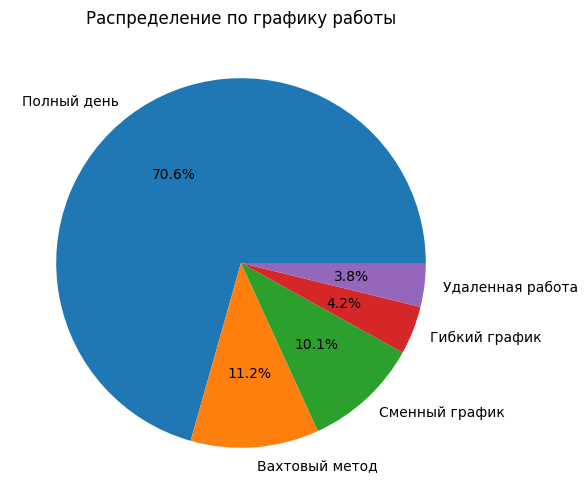

In [ ]:
# Распределение по графику работы
schedule_counts = df['schedule'].value_counts()
schedule_names = {
    'full_day': 'Полный день',
    'labor': 'Сменный график',
    'remote': 'Удаленная работа',
    'flexible': 'Гибкий график',
    'shift': 'Вахтовый метод'
}
schedule_counts.index = schedule_counts.index.map(lambda x: schedule_names.get(x, x))
plt.figure(figsize=(8, 6))
plt.pie(schedule_counts, labels=schedule_counts.index, autopct='%1.1f%%')
plt.title('Распределение по графику работы')
plt.show()

Анализ показал, что большинство работодателей Томской области ищут кандидатов на полный день и очень мало работодателей готовы предложить сотрудникам гибкий или удаленный график работы.



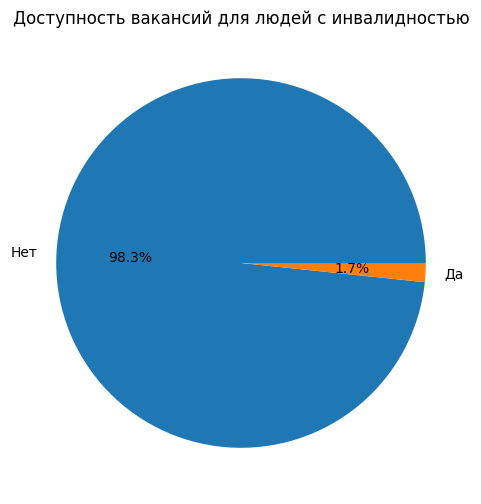

In [ ]:
# Доступность для людей с инвалидностью
handicapped_counts = df['accept_handicapped'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(handicapped_counts, labels=['Нет', 'Да'], autopct='%1.1f%%')
plt.title('Доступность вакансий для людей с инвалидностью')
plt.show()

Анализ показал практически полное отсутствие вакансий в Томской области, доступных для людей с инвалидностью

### Анализ заработных плат

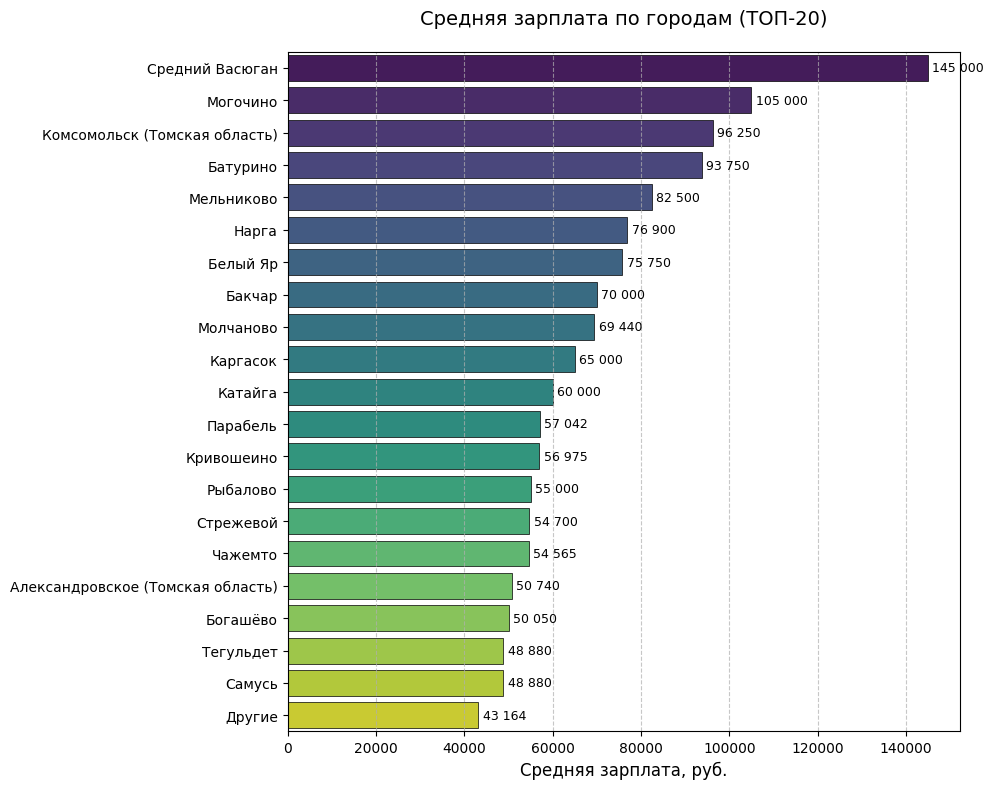

In [ ]:
# Средняя зарплата по городам
city_salary = df.groupby('city')['salary_avg'].median().sort_values(ascending=False)

# Оставим 20 городов с достаточном кол-вом вакансий, остальные сгруппируем в "Другие"
top_cities = city_salary.head(20)
other_salary = city_salary[20:].mean()
if len(city_salary) > 20:
    top_cities['Другие'] = other_salary

plt.figure(figsize=(10, 8), dpi=100)
ax = sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette='viridis',
    edgecolor='black',
    linewidth=0.5
)

plt.title('Средняя зарплата по городам (ТОП-20)', fontsize=14, pad=20)
plt.xlabel('Средняя зарплата, руб.', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, (value, city) in enumerate(zip(top_cities.values, top_cities.index)):
    ax.text(
        value + 1000,
        i,
        f'{int(value):,}'.replace(',', ' '),
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

Таким образом мы видим, что средняя зарплата выше в отдаленных населенных пунктах Томской области. И хотя в Томске больше всего вакансий, средняя зарплата в данном городе даже не входит в топ 20.

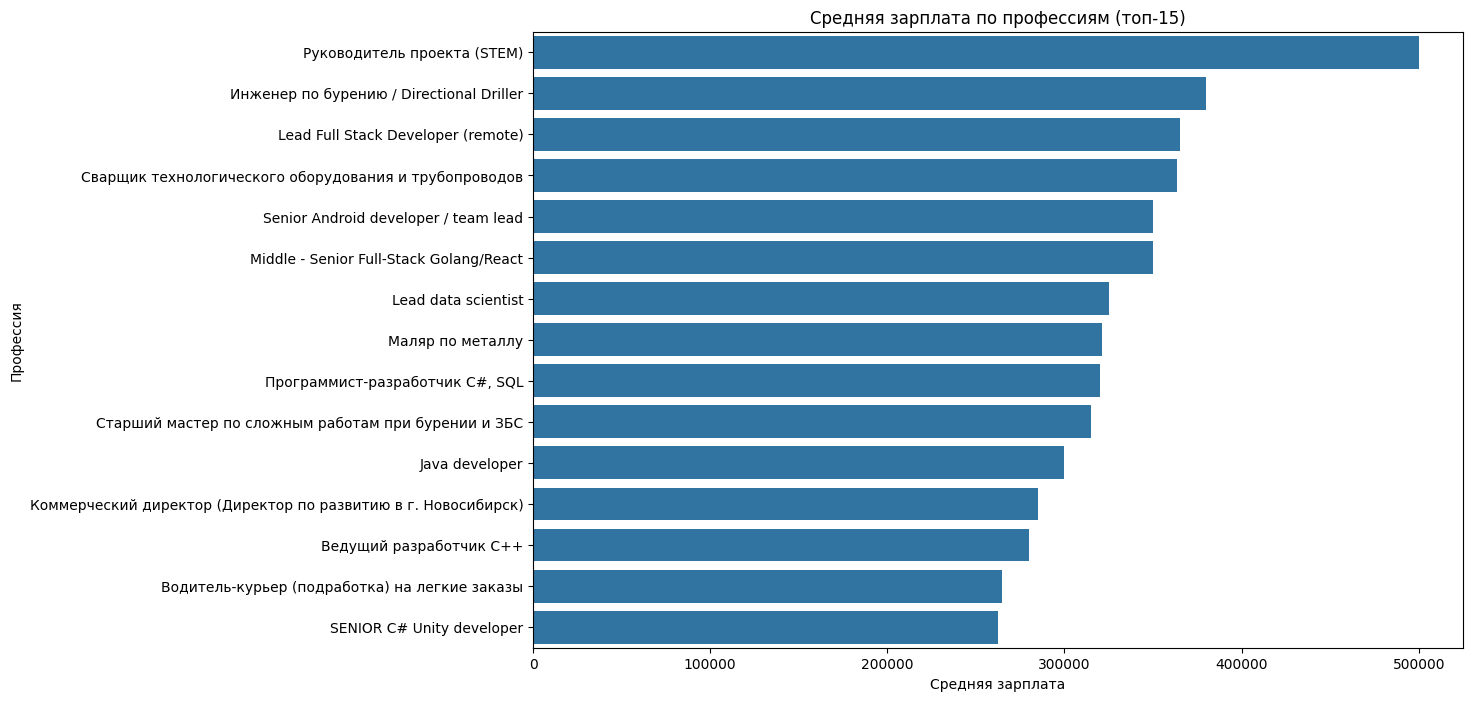

In [ ]:
# Средняя зарплата по профессиям
prof_salary = df.groupby('name')['salary_avg'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 8))
sns.barplot(x=prof_salary.values, y=prof_salary.index)
plt.title('Средняя зарплата по профессиям (топ-15)')
plt.xlabel('Средняя зарплата')
plt.ylabel('Профессия')
plt.show()

Анализ показал, что самую высокую среднюю зарплату в Томской области имеют как правило специалисты технических областей: инженерия, информационные технологии. Также в топ вошли такие профессии как коммерческий директор и водитель-курьер

Анализ корреляций зарплаты с другими факторами

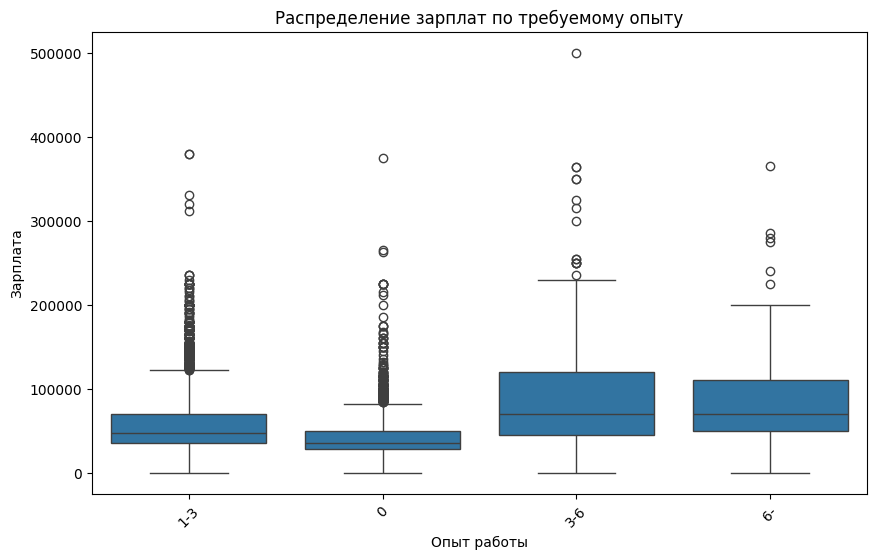

In [ ]:
#Построим боксплот для рассмотрения зависимости уровня заработной платы от опыта
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience', y='salary_avg', data=df)
plt.title('Распределение зарплат по требуемому опыту')
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['salary_avg'].describe()

,salary_avg
count,8870.000000
mean,57368.587373
std,39690.565039
min,20.000000
25%,32500.000000
50%,44725.000000
75%,67500.000000
max,500000.000000


**Анализ корреляции зарплаты и опыта показал следующее: **

1) С увеличением опыта работы наблюдается тенденция к росту медианной зарплаты.

2) Для всех категорий есть значительное количество выбросов, особенно на верхнем уровне, что указывает на присутствие очень высоких зарплат.

3) Разброс зарплат увеличивается с опытом: у сотрудников с опытом >6 лет диапазон выше, чем у менее опытных.

Таким образом можно сделать следующие выводы:

1) Рост зарплат с опытом: Боксплот подтверждает, что с увеличением опыта работы увеличиваются и медианные зарплаты. Наибольшая медиана наблюдается в категории >6 лет.


2) Высокая дисперсия: Значительное стандартное отклонение и большой разброс значений на графике говорят о сильных различиях в зарплатах.





In [ ]:
#так как зарплаты имеют большое количество выбросов, удалим их чтобы они не снизили качество регрессионной модели
def remove_outliers_iqr(df, column, group_column):
    cleaned_data = pd.DataFrame()

    for group in df[group_column].unique():
        subset = df[df[group_column] == group]

        # Вычисляем IQR для каждой группы
        Q1 = subset[column].quantile(0.25)
        Q3 = subset[column].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Фильтруем выбросы
        subset_clean = subset[(subset[column] >= lower_bound) &
                             (subset[column] <= upper_bound)]

        cleaned_data = pd.concat([cleaned_data, subset_clean])

    return cleaned_data

df_clean = remove_outliers_iqr(df, 'salary_avg', 'experience')

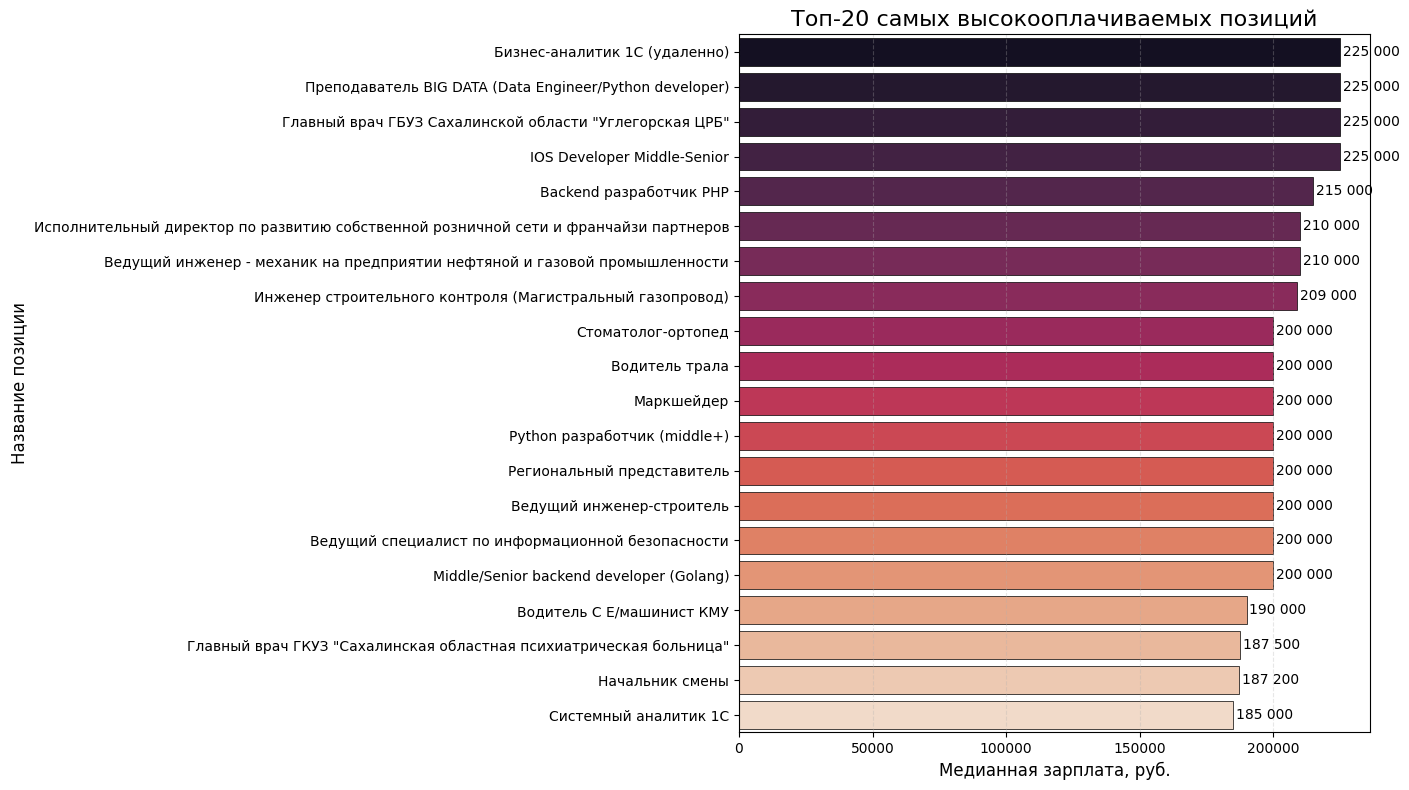

In [ ]:
#зависимость зарплаты от типа вакансии
# Анализ зависимости зарплаты от типа вакансии
plt.figure(figsize=(14, 8))

# Группируем по названию вакансии и считаем медианную зарплату
salary_by_position = df_clean.groupby('name')['salary_avg'].median().sort_values(ascending=False).head(20)

# Создаем barplot
ax = sns.barplot(
    x=salary_by_position.values,
    y=salary_by_position.index,
    palette='rocket',
    edgecolor='black',
    linewidth=0.5
)

# Настройки оформления
plt.title('Топ-20 самых высокооплачиваемых позиций', fontsize=16)
plt.xlabel('Медианная зарплата, руб.', fontsize=12)
plt.ylabel('Название позиции', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Добавляем значения на столбцы
for i, (position, salary) in enumerate(zip(salary_by_position.index, salary_by_position.values)):
    ax.text(
        salary + 1000,  # x-позиция
        i,             # y-позиция
        f'{int(salary):,}'.replace(',', ' '),
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

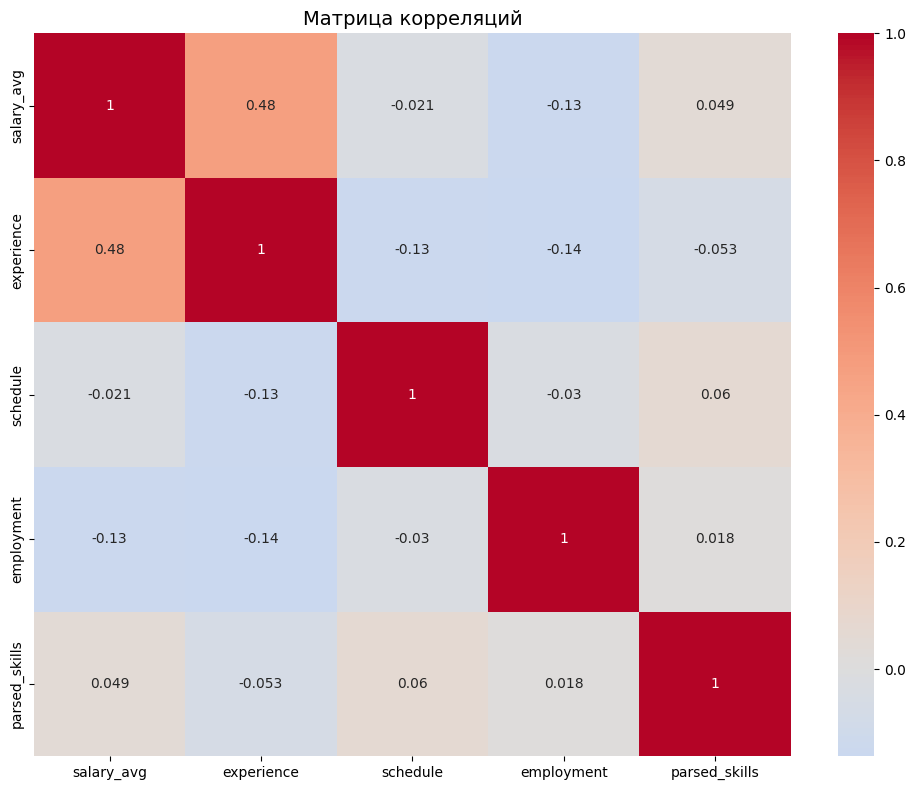

In [ ]:
corr_df = df_clean.copy()
for col in ['schedule', 'employment', 'experience', 'parsed_skills']:
    le = LabelEncoder()
    corr_df[col] = le.fit_transform(corr_df[col].astype(str))

plt.figure(figsize=(10,8))
sns.heatmap(corr_df[['salary_avg', 'experience', 'schedule', 'employment', 'parsed_skills']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций', fontsize=14)
plt.tight_layout()
plt.show()

Наблюдается выраженная корреляция между опытом и заработной платой, остальные признаки практически не оказывают влияния на уровень заработной платы.

### Ключевые выводы о состоянии рынка труда Томской области:

1) Наибольшее количество доступных вакансий наблюдается в крупнейшем городе области - Томске, при этом средняя заработная плата в Томске даже не вошла в топ 20. Наименьшее количество вакансий наблюдается в небольших населенных пунктах: Каргасок, Светлый, Александровское (и др.)


2) Водители категории C, продавцы-консультанты, менеджеры по продажам, бухгалтеры и менеджеры по работе с клиентами составляют основную долю вакансий. Это указывает на потребность в кадрах для торговли, логистики и услуг.

**3) На основе анализа были выявленные следующие вакансии, которые пользуются наибольшим спросом у работодателей: **

-В Томске: бухгалтер (115 вакансий), менеджер по продажам (134), продавец консультант (185), инженер ПТО (102 вакансии)

-В Северске:продавец-консультант (16), водитель категории C (6),торговый представитель (6), менеджер по продажам (5), бухгалтер (5)

-В Стрежевом: водитель категории C (8), продавец-кассир (4),торговый представитель (5)

-В Колпашево: торговый представитель (5),водитель категории C (8)

-В малых городах (Асино, Каргасок, Зональная Станция и др.): водитель категории C (3-9 вакансий)


4) Наиболее востребованные навыки среди работодателей: базовые знания ПК, продажи, грамотная речь и работа в команде. Это подчеркивает важность soft skills и цифровой грамотности для трудоустройства.


5) Из 20 тысяч вакансий 9374, что составляет почти половину от всех вакансий (46%) требуют опыт работы от 1 до 3 лет, что свидетельствует о необходимости переподготовки и обучения для соискателей без опыта.


6) Практически отсутствуют вакансии доступные для людей с инвалидностью (только 1.7%).


7)  70% вакансий требуют работу на полный день и только 8% всех вакансий предоставляют возможность удаленной работы и гибкого графика, что требует внимания поскольку в Томской области много отдаленных населенных пунктов и нужно предоставить жителям данных районов больше возможностей для трудойства.


8) Наибольшей средней зарплатой обладают вакансии на вахтовый метод в отдаленные районы области: Васюган, Мочогино, Комсомольск.

9) Уровень заработной платы зависит от опыта работы, с другими признаками уровень заработной платы не коррелируется.


## Главный вывод:

### Рынок труда Томской области характеризуется выраженной территориальной и профессиональной диспропорцией, где географическая доступность работы обратно пропорциональна уровню оплаты труда, а структура спроса на профессии отражает сырьевую ориентацию экономики с развитым торговым сектором.

### Построенние регрессионной модели для предсказания заработной платы

In [ ]:
#Построение модели RandomForest
ml_df = df_clean.dropna(subset=['salary_avg']).copy()
cat_cols = ['professional_roles', 'city', 'experience', 'schedule', 'employment']
for col in cat_cols:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col].astype(str))
X = ml_df[['professional_roles', 'city', 'experience', 'schedule', 'employment']]
y = ml_df['salary_avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

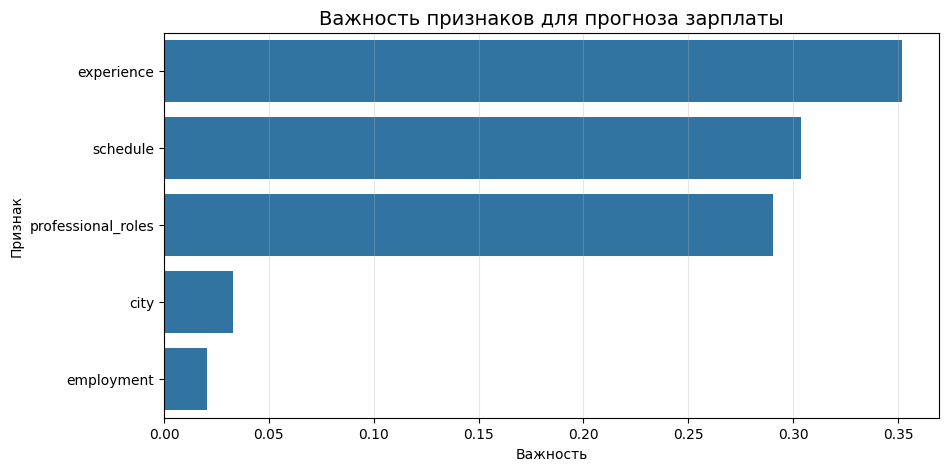

In [ ]:
#выведем важные для прогноза признаки
features = pd.DataFrame({
    'Признак': X.columns,
    'Важность': model.feature_importances_
}).sort_values('Важность', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Важность', y='Признак', data=features)
plt.title('Важность признаков для прогноза зарплаты', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
# Оценка модели
print("Оценка качества модели RandomForestRegressor:")
print(f"- Средняя абсолютная ошибка (MAE): {mean_absolute_error(y_test, y_pred):.2f} руб.")
print(f"- Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"- Корень из MSE (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} руб.")
print(f"- Коэффициент детерминации (R²): {r2_score(y_test, y_pred):.2f}")

Оценка качества модели RandomForestRegressor:
- Средняя абсолютная ошибка (MAE): 13577.05 руб.
- Среднеквадратичная ошибка (MSE): 406569119.25
- Корень из MSE (RMSE): 20163.56 руб.
- Коэффициент детерминации (R²): 0.53


Полученные результаты показывают, что модель объясняет лишь половину дисперсии, что является низким показателем. В связи с этим опробуем другие модели

### Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
# Инициализация модели
gbr = GradientBoostingRegressor(random_state=42)

# Поиск гиперпараметров
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Оценка качества модели
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Оценка качества модели GradientBoostingRegressor:")
print(f"- Средняя абсолютная ошибка (MAE): {mean_absolute_error(y_test, y_pred):.2f} руб.")
print(f"- Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"- Корень из MSE (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} руб.")
print(f"- Коэффициент детерминации (R²): {r2_score(y_test, y_pred):.2f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Оценка качества модели GradientBoostingRegressor:
- Средняя абсолютная ошибка (MAE): 13164.74 руб.
- Среднеквадратичная ошибка (MSE): 348306898.40
- Корень из MSE (RMSE): 18662.98 руб.
- Коэффициент детерминации (R²): 0.59


### Ассамблирование (Stacking)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
]
meta_model = LinearRegression()
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
print("Оценка качества модели Stacking:")
print(f"- Средняя абсолютная ошибка (MAE): {mean_absolute_error(y_test, y_pred):.2f} руб.")
print(f"- Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"- Коэффициент детерминации (R²): {r2_score(y_test, y_pred):.2f}")


Оценка качества модели Stacking:
- Средняя абсолютная ошибка (MAE): 13230.86 руб.
- Среднеквадратичная ошибка (MSE): 359408385.79
- Коэффициент детерминации (R²): 0.58


Вывод по регрессионной модели:

Результаты построения регрессионных моделей показали, что наиболее точной оказалась модель градиентного бустинга (R²=0.59, MAE=13 164 руб.), однако даже она объясняет менее 60% дисперсии зарплат. Основная причина ограниченной точности - слабая корреляция заработной платы с имеющимися признаками, за исключением опыта работы. Для улучшения результатов рекомендуется создать дополнительные комбинированные признаки (например, "опыт × график работы"), применить логарифмирование числовых переменных, а также собрать больше данных о работодателях и специфике вакансий.